### Is this new observation A or B (or C, D, or E) (Classification)
- https://ds.codeup.com/classification/overview/
- Classification is a **supervised learning task**. That means we train on data w/ answers/labels
- We train with answers/labels to produce a `decision rule` we'll use to classify future data.
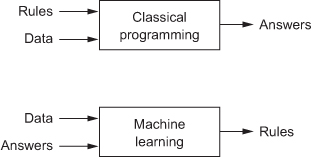
- With classification, we use labeled data to train algorithms to classify future data points.
- The training data allows us to train an algorithm to produce a decision rule
- Using a boundary between points or a distance between points, we classify new datapoints into A or B (or C or D or E)

### Vocab
- **Classifier**: An algorithm that maps the input data to a specific category.

- **Classification Model**: A series of steps that takes the patterns of input variables, generalizes those patterns, and applies them to new data in order to predict the class.

- **Feature**: A feature, aka input/independent variable, is an individual measurable property of a phenomenon being observed.

- **Binary Classification**: Classification with two possible outcomes, e.g. pass/fail.

- **Multiclass Classification**: Classification with more than two classes, where each sample is assigned to one and only one target label, e.g. Grade levels of students in school (1st-12th).

### Common Classification Algorithms
- **Logistic Regression**
    - (`sklearn.linear_model.LogisticRegression`)
    - goal is to find the values for the coefficient that weight each input variable
    - used to predict binary outcomes
    - output is a value btwn 0 and 1 that represents the probability of one class over the other
- **Decision Tree** 
    - (`sklearn.tree.DecisionTreeClassifier`)
    - sequence of rules used to classify 2 or more classes
    - each node represents a single *input variable (x)* and a split point or class of that variable.
    - leaf nodes of the tree contain an *output variable (y)* (used to make a prediction).
    - predictions are made by walking the splits of the tree until arriving at a leaf node and output the class value at the leaf node
- **Naive Bayes** 
    - (`sklearn.naive_bayes.BernoulliNB`)
    - assumes independence btwn every pair of features
    - assumes each input variable is independent (which is often not the case)
    - comprised of 2 types of probabilities that can be calculated directly from your training data:
        - probability of each class
        - conditional probability for each class given each x value
- **K-Nearest Neighbors**
    - (`sklearn.neighbors.KNeighborsClassifier`)
    - makes predictions based on how close a *new* data point is to known data points
    - measures distances between data points
    - predictions are made for a new data point by searching through the entire training set for the K 
- **Random Forest**
    - (`sklearn.ensemble.RandomForestClassifier`)
    - similar to decision tree w/ whole bunch of trees w/ randomness
        - outcome = aggregate of all the trees (ensemble algorithm)
- **Support Vector Machine** 
    - (`sklearn.svm.SVC`)
    - technique that uses higher dimensions to best separate data points into two classes
    - **margin**: distance btwn the hyperplane and the closest data points
    - the best or optimal hyperplane that can separate the two classes is the line that has the largest margin
    - **support vectors**: points that are relevant in defining the hyperplane and in the construction of the classifier
- **Stochastic Gradient Descent** 
    - (`sklearn.linear_model.SGDClassifier`)
- **AdaBoost** 
    - (`sklearn.ensemble.AdaBoostClassifier`)
- **Bagging** 
    - (`sklearn.ensemble.BaggingClassifier`)
- **Gradient Boosting**
    - (`sklearn.ensemble.GradientBoostingClassifier`)

# Data Acquisition

### From a Database:
Create a Dataframe using a SQL query to access a database

In [ ]:
# Import private info to keep it secret in public files.
from env import host, password, user

# Test query in Sequel Pro and save to a variable.
sql_query = 'write your sql query here; test it in Sequel Pro first!'

# Save connection url to a variable for use with pandas `read_sql()` function.
connection_url = f'mysql+pymysql://{user}:{password}@{host}/database_name'

# Python function to read data from database into a DataFrame.
pd.read_sql(sql_query, connection_url)

### From Files:

In [ ]:
# Create Dataframe from a local csv file
#**Note**: if you are working with a folder within your directory, 
#you have to specify ‘folder_name/file_name’
df = pd.read_csv('file_path_or_folder/file_name.csv')

#or
df = pd.read_csv('file_name.csv')



# Create DataFrame from an AWS S3 file. (amazon web services)
df = pd.read_csv('https://s3.amazonaws.com/bucket_and_or_file_name.csv')




# Create DataFrame from a Google sheet using its Share url.
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

### From your Clipboard
Read copy-pasted tabular data and parse it into a Dataframe

In [ ]:
# Default
df = pd.read_clipboard(sep='\\s+', **kwargs)

# Some examples of options I have.
columns = ['column_1', 'column_2', 'column_3']
df = pd.read_clipboard(sep=',', header=None, names=columns)

### From an Excel Sheet
Create a Dataframe based on the contents of an excel spreadsheet

In [ ]:
#Stp 1: Download as Microsoft Excel file in Google Sheets 
#Stp 2: Move downloaded file to desired folder in order to load/read data
pd.read_excel('file_name.xlsx')

#specify sheet name
pd.read_excel('file_name.xlsx', sheet_name='sheet_name') 

#specify sheet name and columns
pd.read_excel('file_name.xlsx', sheet_name= 'sheet_name',  usecols=['col_name1', 'col_name2'])

### From modules (Pydataset or Seaborn)

In [ ]:
#pydataset
from pydataset import data

#show documentation
data('dataset_name', show_doc=True)

#show data
df = data('dataset_name')
df.head()

In [ ]:
#seaborn
import seaborn as sns

#show data
df = sns.load_dataset('dataset_name')
df.head()

### Important to:
- use pandas methods and attributes to do some initial summarization and exploration of your data.
    - `.head()`
    - `.shape`
    - `.info()`
    - `.columns`
    - `.dtypes`
    - `.describe()`
    - `.value_counts()`
    
- create functions that acquire data from database
- save the data locally to CSV files (cache your data)
- check for CSV files upon subsequent use.
- create python module, acquire.py, that holds your functions that acquire the data you want to use and can be imported and called in other notebooks and scripts.





- **Imports**:
    - `import pandas as pd`
    - `import numpy as np`
    - `import os`

- visualize:
   - `import seaborn as sns`
   - `import matplotlib.pyplot as plt`
   - `plt.rc('figure', figsize=(11, 9))`
   - `plt.rc('font', size=13)`

- turn off pink warning boxes:
   - `import warnings`
   - `warnings.filterwarnings("ignore")`

- acquire:
   - `from env import host, user, password`
   - `from pydataset import data`

In [ ]:
# Create helper function to get the necessary connection url.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# Use the above helper function and a sql query in a single function.
def get_db_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    sql_query = 'write your sql query here; test it in Sequel Pro first!'
    return pd.read_sql(sql_query, get_connection('database_name'))

### Caching Data

- Caching or storing data you've retrieved from a database or website makes accessing it later much faster. Basically, cached data reduces load times.

- We can design our acquire functions to get our data for us faster by reading in a csv file, if one exists, and if not, acquiring our data and creating a csv file for later use.

- The `os.path.isfile()` method in Python is used to check whether a specified path is an existing file or not. It returns a boolean value.

- https://github.com/CodeupClassroom/easley-classification-exercises/blob/main/classification_acquire_lesson.ipynb

# Data Preparation
https://ds.codeup.com/classification/prep/
https://github.com/aliciag92/classification-exercises/blob/main/classification_prepare_lesson.ipynb
## What are we doing and why
**What**: Clean and tidy our data so that it is ready for exploration, analysis and modeling

**Why**: Set ourselves up for certainty!

- 1) Ensure that our observations will be sound:
    - Validity of statistical and human observations
- 2) Ensure that we will not have computational errors:
    - non numerical data cells, nulls/NaNs
- 3) Protect against overfitting:
    - Ensure that have a split data structure prior to drawing conclusions

**Input**: An aquired dataset (One Pandas Dataframe) ------> **Output**: Tidied and cleaned data split into Train,  Validate, and Test sets (Three Pandas Dataframes)


**Processes**: Summarize the data ---> Clean the data ---> Split the data

### Summarize
- head(), describe(), info(), isnull(), value_counts(), shape, ...
- plt.hist(), plt.boxplot()
- document takeaways (nulls, datatypes to change, outliers, ideas for features, etc.)
- imports:
    - `import pandas as pd`
    - `import numpy as np`
    - `import matplotlib.pyplot as plt`

    - `from sklearn.model_selection import train_test_split`
    - `from sklearn.impute import SimpleImputer`

    - `import warnings`
    - `warnings.filterwarnings("ignore")`

    - `import acquire`

### Clean
- **missing values**: drop columns with too many missing values, drop rows with too many missing values, fill with zero where it makes sense, and then make note of any columns you want to impute missing values in (you will need to do that on split data).
- **outlier**: an observation point that is distant from other observations https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/
- **outliers**: ignore, drop rows, snap to a selected max/min value, create bins (cut, qcut)
- **data errors**: drop the rows/observations with the errors, correct them to what it was intended
- address **text normalization** issues...e.g. deck 'C' 'c'. (correct and standardize the text)
- **tidy data**: getting your data in the shape it needs to be for modeling and exploring. every row should be an observation and every column should be a feature/attribute/variable. You want 1 observation per row, and 1 row per observation. If you want to predict a customer churn, each row should be a customer and each customer should be on only 1 row. (address duplicates, aggregate, melt, reshape, ...)
- **creating new variables out of existing variables** (e.g. z = x - y)
- **rename columns**
- **datatypes**: need numeric data to be able to feed into model (**dummy vars, factor vars, manual encoding**)
- **scale numeric data**: so that continuous variables have the same weight, are on the same units, if algorithm will be used that will be affected by the differing weights, or if data needs to be scaled to a gaussian/normal distribution for statistical testing. (linear scalers and non-linear scalers)

### Train, Validate, Test Split
- split our data into train, validate and test sample dataframes
- Why? **overfitting**: model is not generalizable. It fits the data you've trained it on "too well". 3 points does not necessarily mean a parabola.
- **train**: *in-sample*, explore, impute mean, scale numeric data (max() - min()...), fit our ml algorithms, test our models.
- **validate, test**: represents future, unseen data
- **validate**: confirm our top models have not overfit, test our top n models on unseen data. Using validate performance results, we pick the top **1** model.
- **test**: *out-of-sample*, how we expect our top model to perform in production, on unseen data in the future. **ONLY USED ON 1 MODEL**.
- You want to do all the prep that can be done on the full dataset before you split. Go through, work on DF for all you need to, then move to train when it's time. So you don't have to go back and forth, because that leads to errors and inconsistencies in data.

> Should I do this on the full dataset or on the train sample?

*this*: the action, method, function, step you are about to take on your data.

- Are you comparing, looking at the relationship or summary stats or visualizations with 2+ variables?
- Are you using an sklearn method?
- Are you moving into the explore stage of the pipeline?


If ONE or more of these is yes, then you should be doing it on your train sample. If ALL are no, then the entire dataset is fine.

### Option for Missing Values: Impute
We can impute values using the mean, median, mode (most frequent), or a constant value. We will use `sklearn.imputer.SimpleImputer` to do this.

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified
5. Create the SimpleImputer object, which we will store in the variable imputer. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable we will reference.

# Tidy Data
### Vocab
- **Value**: every value belongs to a variable and an observation.
- **Variable**: a variable contains all values that measure the same underlying attribute (like height, temperature, duration) across units.
- **Observation**: an observation contains all values measured on the same unit (like a person, or a day, or a race) across attributes.





- Each **variable** forms a column.
- Each **observation** forms a row.
- Each cell has a single **value**.





- Data is TABULAR, i.e. made up of rows and columns



### Reshaping Data:
- **Wide data** (alot of columns spread across) --> **Long Data** format (requires a *melt*)

- **Long data** (alot of rows spread down) --> **Wide Data** format (requires a *pivot* or *spread*)


### Tidying Messy datasets
1. Column headers are values, not variable names.
2. Multiple variables are stored in one column.
3. Variables are stored in both rows and columns.
4. Multiple types of observational units are stored in the same table.
5. A single observational unit is stored in multiple tables.

## `pd.melt` arguments
- `id_vars` = columns you want to **keep** (not melt)
- `var_name` = name of **new column** you **created by melting columns**
- `value_name` = column **name for resulting values**

## `pd.pivot_table` arguments
- `index` = columns you want to keep (not pivot)
- `columns` = column you want **to pivot**
- `values` = **values** we want to populate in the **new columns**
- `aggfunct` = how you want to **aggregate** the **duplicate rows**

https://github.com/aliciag92/classification-exercises